# **Stock (ARTO) Predictive Modelling**

## **Data Load & Understanding**

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [ ]:
# Connecting Google Drive and Google Colab
from google.colab import drive
drive.mount('/content/gdrive')

# Retrieve the dataset
dataset = '/content/gdrive/MyDrive/Project/Stock Prediction/Data/Cleaned Data/ARTO_Cleaned.csv'
df = pd.read_csv(dataset)

Mounted at /content/gdrive


The data used in the research in this code is data that has been cleaned/pre-processed, so that the existing data is ready to be used in the modeling stage.

In [ ]:
# Display the contents of the dataset as a whole
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-31,184.0,184.0,184.0,184.0,184.0,0.0
1,2019-01-01,184.0,184.0,184.0,184.0,184.0,0.0
2,2019-01-02,189.0,199.0,176.0,188.0,188.0,664200.0
3,2019-01-03,188.0,188.0,178.0,182.0,182.0,296500.0
4,2019-01-04,182.0,187.0,180.0,183.0,183.0,409100.0
...,...,...,...,...,...,...,...
1156,2023-12-21,2950.0,3000.0,2900.0,2970.0,2970.0,11397400.0
1157,2023-12-22,2970.0,3080.0,2920.0,2930.0,2930.0,14809300.0
1158,2023-12-27,2960.0,3010.0,2940.0,2970.0,2970.0,7535000.0
1159,2023-12-28,2990.0,3010.0,2920.0,2940.0,2940.0,7909800.0


In [ ]:
# Checking the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1161 non-null   object 
 1   Open       1161 non-null   float64
 2   High       1161 non-null   float64
 3   Low        1161 non-null   float64
 4   Close      1161 non-null   float64
 5   Adj Close  1161 non-null   float64
 6   Volume     1161 non-null   float64
dtypes: float64(6), object(1)
memory usage: 63.6+ KB


In [ ]:
# Check the number of columns and rows in the data
df.shape

(1161, 7)

In [ ]:
# Shows a description of the data
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1.161000e+03
mean,5430.102701,5564.801344,5285.336491,5413.831000,5413.831000,1.064272e+07
std,5268.099801,5378.661258,5128.797708,5250.811871,5250.811871,1.196015e+07
min,132.000000,147.000000,130.000000,145.000000,145.000000,0.000000e+00
25%,2010.000000,2080.000000,1935.000000,2010.000000,2010.000000,6.710000e+04
50%,2970.000000,3050.000000,2900.000000,2960.000000,2960.000000,7.028800e+06
75%,9250.000000,9550.000000,9000.000000,9205.544922,9205.544922,1.873630e+07
max,18950.000000,19150.000000,18650.000000,18950.000000,18950.000000,4.632670e+07


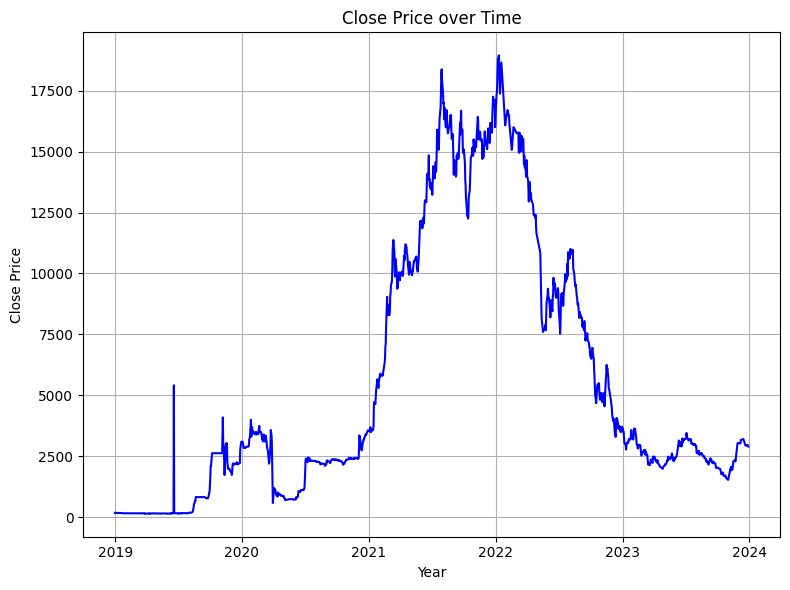

In [ ]:
# Visualize the actual price of the 'Close' attribute by time

# Make sure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

plt.figure(figsize=(8, 6))
plt.plot(df['Date'], df['Close'], linestyle='-', color='blue')

# Label the x and y axes
plt.xlabel('Year')
plt.ylabel('Close Price')

# Format the x-axis to display only the year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

# Chart title
plt.title('Close Price over Time')

# Display the chart
plt.grid(True)
plt.tight_layout()
plt.show()

The visualization is the closing price (close) of JKSE which has been summarized and later predictions will be made to determine the value with several models that will be tried.

## **Data Pre-Processing**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### **Data Splitting**

In [ ]:
training_set = df.iloc[:, 4:5].values #creates a numpy array training_set

In [ ]:
training_set.dtype

dtype('float64')

In [ ]:
training_set

array([[ 184.],
       [ 184.],
       [ 188.],
       ...,
       [2970.],
       [2940.],
       [2900.]])

In [ ]:
training_set.shape

(1161, 1)

### **Normalization (Feature Scaling)**

In [ ]:
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.00207392],
       [0.00207392],
       [0.00228663],
       ...,
       [0.150226  ],
       [0.14863068],
       [0.14650359]])

In [ ]:
training_set_scaled.shape

(1161, 1)

### **Creating Data Structure**

In [ ]:
X_train = training_set_scaled
Y_train = training_set_scaled

# Turning lists into Numpy arrays
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
X_train

array([[0.00207392],
       [0.00207392],
       [0.00228663],
       ...,
       [0.150226  ],
       [0.14863068],
       [0.14650359]])

In [ ]:
X_train.shape

(1161, 1)

### **Reshaping**

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
X_train

array([[[0.00207392]],

       [[0.00207392]],

       [[0.00228663]],

       ...,

       [[0.150226  ]],

       [[0.14863068]],

       [[0.14650359]]])

## **Modelling & Evaluation**

### **Long Short-Term Memory (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### **Building LSTM Architecture**

In [ ]:
# Creating a LSTM model
lstm_model = Sequential()

# Adding a LSTM layer
lstm_model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1],1)))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = True))
lstm_model.add(Dropout(0.25))
lstm_model.add(LSTM(units = 64, return_sequences = False))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(units= 1))

# Compile the LSTM model
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#### **Training LSTM Model**

In [ ]:
# Train the LSTM model
lstm_model.fit(X_train,Y_train, epochs = 100, batch_size = 32)

Epoch 1/100
37/37 [==============================] - 9s 7ms/step - loss: 0.1123
Epoch 2/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0443
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0046
Epoch 5/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 7/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 9/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 10/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 11/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 12/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 13/100
37/37 [=================

#### **Testing LSTM Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[ 184.],
       [ 184.],
       [ 188.],
       ...,
       [2970.],
       [2940.],
       [2900.]])

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.00207392],
       [0.00207392],
       [0.00228663],
       ...,
       [0.150226  ],
       [0.14863068],
       [0.14650359]])

In [ ]:
inputs.shape

(1161, 1)

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_lstm = lstm_model.predict(X_test)
predicted_stock_price_lstm = sc.inverse_transform(predicted_stock_price_lstm)

37/37 [==============================] - 2s 3ms/step


In [ ]:
predicted_stock_price_lstm

array([[ 587.4291 ],
       [ 587.4291 ],
       [ 590.55206],
       ...,
       [2954.2207 ],
       [2926.7136 ],
       [2890.1042 ]], dtype=float32)

In [ ]:
predicted_stock_price_lstm.shape

(1161, 1)

In [ ]:
# Add the predicted values to the DataFrame
df['LSTM Predictions'] = predicted_stock_price_lstm

# Print or visualize the results as needed
df[['Date', 'Close', 'LSTM Predictions']]

,Date,Close,LSTM Predictions
0,2018-12-31,184.0,587.429077
1,2019-01-01,184.0,587.429077
2,2019-01-02,188.0,590.552063
3,2019-01-03,182.0,585.868042
4,2019-01-04,183.0,586.648438
...,...,...,...
1156,2023-12-21,2970.0,2954.220703
1157,2023-12-22,2930.0,2917.554443
1158,2023-12-27,2970.0,2954.220703
1159,2023-12-28,2940.0,2926.713623


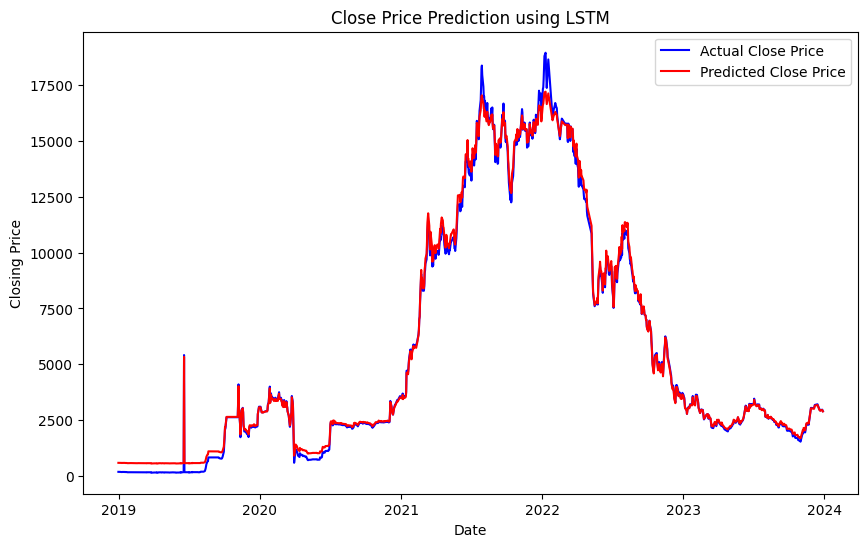

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['LSTM Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = lstm_model.predict(X_train)

# Calculate MSE
mse_lstm = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_lstm = sqrt(mse_lstm)

# Calculating MAPE
mape_lstm = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_lstm}%')

37/37 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 0.0001894462188479953
Root Mean Squared Error (RMSE): 0.013763946339912667
Mean Absolute Percentage Error (MAPE): 377850.64141432394%


#### **Saving LSTM Model**

In [ ]:
from keras.models import load_model
lstm_model.save('ARTO_LSTM_Model.h5')

### **Gated Recurrent Unit (GRU)**

In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout

#### **Building GRU Architecture**

In [ ]:
# Creating a GRU model
gru_model = Sequential()

# Adding a GRU layer
gru_model.add(GRU(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=True))
gru_model.add(Dropout(0.25))
gru_model.add(GRU(units=64, return_sequences=False))
gru_model.add(Dropout(0.25))
gru_model.add(Dense(units=1))

# Compile the GRU model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

#### **Training GRU Model**

In [ ]:
# Train the GRU model
gru_model.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 9s 8ms/step - loss: 0.0787
Epoch 2/100
37/37 [==============================] - 0s 7ms/step - loss: 0.0081
Epoch 3/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0037
Epoch 4/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 5/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0038
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 7/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 8/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0025
Epoch 9/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 10/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 11/100
37/37 [==============================] - 0s 9ms/step - loss: 0.0024
Epoch 12/100
37/37 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 13/100
37/37 [=================

#### **Testing GRU Model**

In [ ]:
dataset_test = df
real_stock_price = dataset_test.iloc[:,4:5].values
real_stock_price

array([[ 184.],
       [ 184.],
       [ 188.],
       ...,
       [2970.],
       [2940.],
       [2900.]])

In [ ]:
dataset_total = pd.concat((df['Close'], dataset_test['Close']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test):].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
inputs

array([[0.00207392],
       [0.00207392],
       [0.00228663],
       ...,
       [0.150226  ],
       [0.14863068],
       [0.14650359]])

In [ ]:
X_test = inputs
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price_gru = gru_model.predict(X_test)
predicted_stock_price_gru = sc.inverse_transform(predicted_stock_price_gru)

37/37 [==============================] - 1s 3ms/step


In [ ]:
predicted_stock_price_gru

array([[ 839.34973],
       [ 839.34973],
       [ 842.31946],
       ...,
       [3086.8645 ],
       [3060.782  ],
       [3026.0667 ]], dtype=float32)

In [ ]:
# Add the predicted values to the DataFrame
df['GRU Predictions'] = predicted_stock_price_gru

# Print or visualize the results as needed
df[['Date', 'Close', 'GRU Predictions']]

,Date,Close,GRU Predictions
0,2018-12-31,184.0,839.349731
1,2019-01-01,184.0,839.349731
2,2019-01-02,188.0,842.319458
3,2019-01-03,182.0,837.864868
4,2019-01-04,183.0,838.607117
...,...,...,...
1156,2023-12-21,2970.0,3086.864502
1157,2023-12-22,2930.0,3052.096680
1158,2023-12-27,2970.0,3086.864502
1159,2023-12-28,2940.0,3060.781982


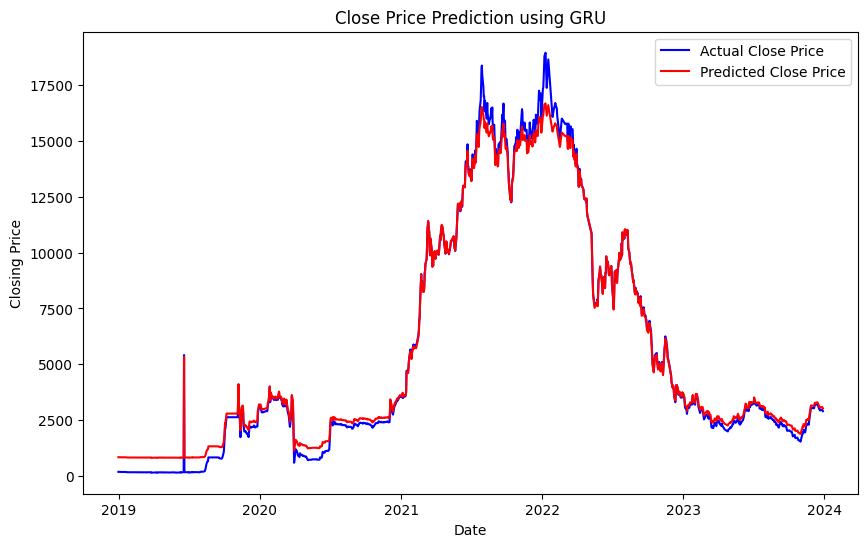

In [ ]:
# Plot the actual closing prices and predictions
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='blue')
plt.plot(df['Date'], df['GRU Predictions'], label='Predicted Close Price', color='red')
plt.title('Close Price Prediction using GRU')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

#### **Model Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# Perform prediction on training data
y_pred = gru_model.predict(X_train)

# Calculate MSE
mse_gru = mean_squared_error(Y_train, y_pred)

# Calculating RMSE
rmse_gru = sqrt(mse_gru)

# Calculating MAPE
mape_gru = np.mean(np.abs((Y_train - y_pred) / np.maximum(1e-8, np.abs(Y_train)))) * 100

# Displaying results
print(f'Mean Squared Error (MSE): {mse_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_gru}%')

37/37 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.00045935732667442576
Root Mean Squared Error (RMSE): 0.021432622953675682
Mean Absolute Percentage Error (MAPE): 610248.1363599781%


#### **Saving GRU Model**

In [ ]:
from keras.models import load_model
gru_model.save('ARTO_GRU_Model.h5')

## **Conclusion**

In [ ]:
model_comparison = pd.DataFrame({'Model': ['LSTM','GRU'], 'MSE': [mse_lstm,mse_gru], 'RMSE': [rmse_lstm,rmse_gru], 'MAPE': [mape_lstm*100,mape_gru*100]})
model_comparison

,Model,MSE,RMSE,MAPE
0,LSTM,0.000189,0.013764,3.778506e+07
1,GRU,0.000459,0.021433,6.102481e+07
